# Imports

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score

# Load Data

In [51]:
df = pd.read_csv('https://raw.githubusercontent.com/renatomaaliw3/public_files/refs/heads/master/Data%20Sets/synthetic_moons_dataset.csv')
df

,Feature_1,Feature_2,True_Label
0,0.646707,-0.361342,1
1,1.958958,-0.134428,1
2,-0.097559,0.455426,1
3,0.914638,0.257026,0
4,1.181199,-0.493592,1
...,...,...,...
295,0.361332,-0.174893,1
296,0.163768,1.071633,0
297,-0.648162,0.831739,0
298,1.711957,-0.078109,1


In [52]:
# Separate features and true labels (labels are used for evaluation only)
X = df[["Feature_1", "Feature_2"]].values
true_labels = df["True_Label"].values
X

array([[ 0.64670676, -0.36134214],
       [ 1.95895776, -0.13442764],
       [-0.09755939,  0.45542639],
       [ 0.91463832,  0.25702643],
       [ 1.18119912, -0.49359235],
       [ 1.02293223, -0.44767606],
       [ 0.40293545, -0.27042872],
       [-0.59175171,  0.72294535],
       [ 0.92962492,  0.06931983],
       [ 0.18544463,  0.00343333],
       [ 1.30462106, -0.34206396],
       [ 0.3768301 ,  0.87607049],
       [ 0.93739892, -0.48702817],
       [ 0.64372751,  0.88735263],
       [ 0.15197784, -0.02792624],
       [ 0.9896297 , -0.53955163],
       [ 1.99916583,  0.30871812],
       [ 0.72086237, -0.39872856],
       [-0.89916279,  0.0215944 ],
       [ 0.14275884,  0.25815262],
       [-0.05746811,  1.00961099],
       [-0.80617488,  0.58317333],
       [ 1.50545272, -0.4294331 ],
       [ 1.50934882, -0.3963383 ],
       [-0.70785096,  0.83773005],
       [ 0.60384683,  0.77987684],
       [ 1.86632368,  0.10608695],
       [ 2.10567226,  0.42476046],
       [ 0.04934223,

In [53]:
# Standardizing the features is often useful in clustering

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled

array([[ 0.16766129, -1.23765935],
       [ 1.6732739 , -0.78160951],
       [-0.68627328,  0.4038715 ],
       [ 0.47507285,  0.00512982],
       [ 0.78091168, -1.50345412],
       [ 0.59932399, -1.41117214],
       [-0.11202999, -1.05494273],
       [-1.25328538,  0.94152765],
       [ 0.49226775, -0.37212047],
       [-0.36156832, -0.50453832],
       [ 0.92251998, -1.1989143 ],
       [-0.14198199,  1.24927657],
       [ 0.50118725, -1.4902615 ],
       [ 0.16424304,  1.27195129],
       [-0.39996648, -0.56756437],
       [ 0.56111429, -1.59582248],
       [ 1.71940666,  0.10901912],
       [ 0.2527438 , -1.31279809],
       [-1.60599381, -0.46803843],
       [-0.41054391,  0.00739322],
       [-0.64027451,  1.51766455],
       [-1.49930404,  0.66061564],
       [ 1.1529444 , -1.37450767],
       [ 1.1574146 , -1.30799418],
       [-1.38649199,  1.17222046],
       [ 0.1184859 ,  1.05594782],
       [ 1.56699009, -0.29822639],
       [ 1.84160694,  0.34223951],
       [-0.51772556,

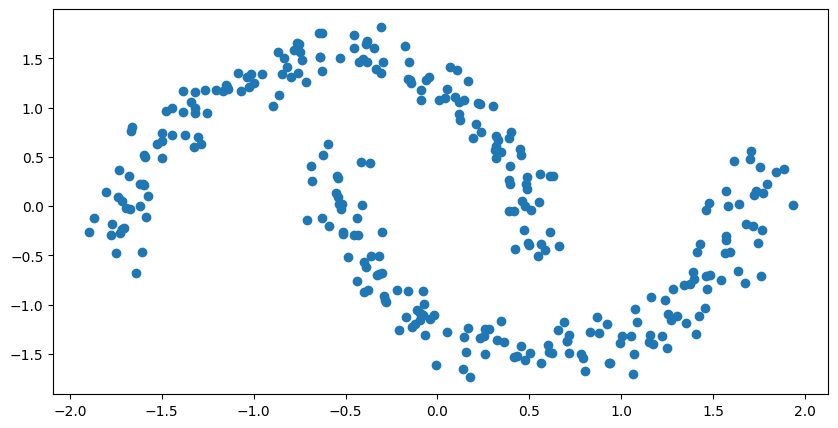

In [54]:
# Visualization

plt.figure(figsize = (10,5))
plt.scatter(X_scaled[:,0], X_scaled[:,1])

plt.show()

In [55]:
# Apply Spectral Clustering
# n_clusters = 2 because we know make_moons generates 2 classes (very obvious)
# affinity ='nearest_neighbors' builds a similarity graph from k-nearest neighbors

spectral_model = SpectralClustering(n_clusters = 2,
                                    affinity='nearest_neighbors', # can be 'discretize'
                                    assign_labels='kmeans',
                                    random_state = 42,
                                    n_neighbors = 10
                                    )

In [56]:
# Fit and assign the cluster labels

predicted_labels = spectral_model.fit_predict(X_scaled)
predicted_labels

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1], d

In [57]:
# Optional

# Using Adjusted Rand Index to compare clustering with ground truth
ari_score = adjusted_rand_score(true_labels, predicted_labels)
print(f"Adjusted Rand Index: {ari_score:.3f}")

Adjusted Rand Index: 1.000


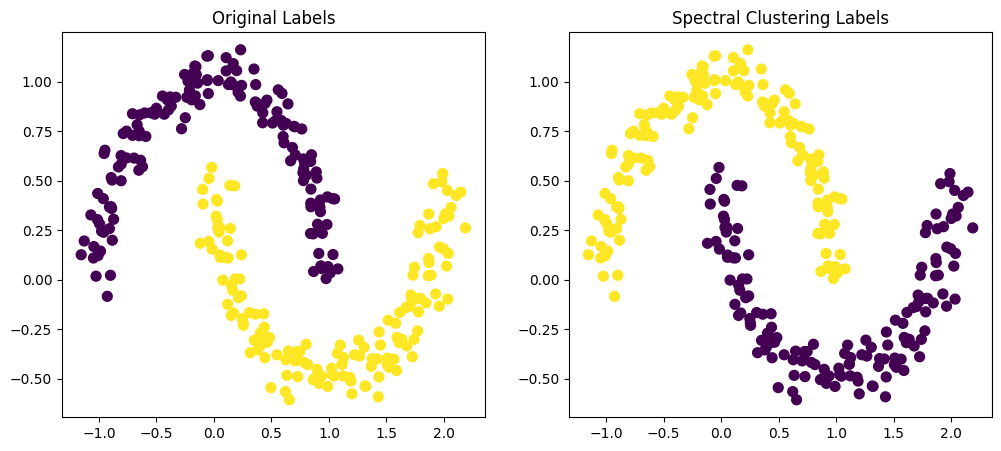

In [59]:
# Visualize the Results

# Plotting the original and clustered data side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original labels
axes[0].scatter(X[:, 0], X[:, 1], c = true_labels, s = 50)
axes[0].set_title("Original Labels")

# Predicted cluster labels
axes[1].scatter(X[:, 0], X[:, 1], c = predicted_labels, s = 50)
axes[1].set_title("Spectral Clustering Labels")

plt.show()